In [133]:
#라이브러리 import

!pip install koreanize-matplotlib
import lxml
from bs4 import BeautifulSoup
import pandas as pd
import requests
import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# url 입력, url1은 발매채널별 승차권 현황, url2는 SR운영역 승차권 발매 현황, URL3은 연도별 SR승차권 발매현황, URL4는 특실/일반실 승차인원
url1 = 'https://apis.data.go.kr/B553912/tk_sales/v1/channel_sales?serviceKey=1bVt7XCloZptrTwPRfarbdvxEDoRb1WeHHMuuqkVGHEKIr83gR4I15YQhuXkxNo7QW3PigOT3%2BnsuLi4Mt9dMg%3D%3D&page=1&perPage=20000&cond%5BRUN_YMD%3A%3ALT%5D=20231231&cond%5BRUN_YMD%3A%3ALTE%5D=20231231&cond%5BRUN_YMD%3A%3AGT%5D=20221231&cond%5BRUN_YMD%3A%3AGTE%5D=20221231'
url2 = 'https://apis.data.go.kr/B553912/tk_sales/v1/srt_station_sales?serviceKey=1bVt7XCloZptrTwPRfarbdvxEDoRb1WeHHMuuqkVGHEKIr83gR4I15YQhuXkxNo7QW3PigOT3%2BnsuLi4Mt9dMg%3D%3D&page=1&perPage=20000&cond%5BRUN_YMD%3A%3ALT%5D=20231231&cond%5BRUN_YMD%3A%3ALTE%5D=20231231&cond%5BRUN_YMD%3A%3AGT%5D=20221231&cond%5BRUN_YMD%3A%3AGTE%5D=20221231'
url3 = 'https://apis.data.go.kr/B553912/tk_sales/v1/yearly_sales?serviceKey=1bVt7XCloZptrTwPRfarbdvxEDoRb1WeHHMuuqkVGHEKIr83gR4I15YQhuXkxNo7QW3PigOT3%2BnsuLi4Mt9dMg%3D%3D&page=1&perPage=20000cond%5BRUN_YR%3A%3ALT%5D=2023&cond%5BRUN_YR%3A%3ALTE%5D=2023&cond%5BRUN_YR%3A%3AGT%5D=2021&cond%5BRUN_YR%3A%3AGTE%5D=2021'
url4 = 'https://apis.data.go.kr/B553912/tk_sales/v1/room_class_passengers?serviceKey=1bVt7XCloZptrTwPRfarbdvxEDoRb1WeHHMuuqkVGHEKIr83gR4I15YQhuXkxNo7QW3PigOT3%2BnsuLi4Mt9dMg%3D%3D&page=1&perPage=20000&cond%5BRUN_YM%3A%3ALT%5D=202312&cond%5BRUN_YM%3A%3ALTE%5D=202312&cond%5BRUN_YM%3A%3AGT%5D=202301&cond%5BRUN_YM%3A%3AGTE%5D=202301'
url5 = 'https://apis.data.go.kr/B553912/srt_passenger/v1/station_passengers?serviceKey=1bVt7XCloZptrTwPRfarbdvxEDoRb1WeHHMuuqkVGHEKIr83gR4I15YQhuXkxNo7QW3PigOT3%252BnsuLi4Mt9dMg%253D%253D&page=1&perPage=20000&cond%5BRUN_YM%3A%3ALT%5D=202312&cond%5BRUN_YM%3A%3ALTE%5D=202312&cond%5BRUN_YM%3A%3AGT%5D=202301&cond%5BRUN_YM%3A%3AGTE%5D=202212'

li = [url1,url2,url3,url4,url5]
dfs = []
# url 불러오기
for i in li:
    response = requests.get(i)
    contents = response.text
    json_ob = json.loads(contents)
    data = json_ob['data']
    df = pd.json_normalize(data)
    dfs.append(df)

by_channel = dfs[0]
by_station = dfs[1]
by_year = dfs[2]
by_room = dfs[3] 
stop_station = dfs[4]

In [139]:
#데이터 열 이름 바꾸기

by_channel = by_channel.rename(columns={'PRT_CMPTN_QNTY':'인쇄완료수량',
                          'RFND_QNTY':'환불수',
                          'ROUTE_NM':'노선명',
                          'RUN_YMD':'운행일자',
                          'SELLNG_QNTY':'발매수량',
                          'SELLNG_WICKET_KND_CD':'발매창구종류코드',
                          'SELLNG_WICKET_KND_NM':'발매창구종류명',
                          'SELLNG_YMD':'발매일자'})

by_station = by_station.rename(columns={'PRT_CMPTN_QNTY':'인쇄완료수량',
                          'RFND_QNTY':'환불수',
                          'ROUTE_NM':'노선명',
                          'RUN_YMD':'운행일자',
                          'SELLNG_QNTY':'발매수량',
                          'SELLNG_STN_NM':'발매역명',
                          'SELLNG_YMD':'발매일자',
                          'SELLNG_STN_CD':'발매역코드'})

by_year = by_year.rename(columns={'PRT_CMPTN_QNTY':'인쇄완료수량',
                       'RFND_QNTY':'환불수',
                       'ROUTE_NM':'노선명',
                        'RUN_YR':'운행년도',
                       'SELLNG_QNTY':'발매수량'})

by_room = by_room.rename(columns={'PSRM_GRD_CD':'객실등급코드',
                        'PSRM_GRD_NM':'객실등급명',
                        'ROUTE_NM':'노선명',
                        'RUN_YM':'운행연월',
                        'TKCAR_NMPR_CNT':'승차인원수'})

In [123]:
by_channel

,인쇄완료수량,환불수,노선명,운행일자,발매수량,발매창구종류코드,발매창구종류명,발매일자
0,5,16,경부선,20230101,21,0011,역,20221201
1,0,3,경부선,20230101,3,0027,철도공사 자회사 위탁운영역,20221201
2,2,0,경부선,20230101,2,0036,현금ATM,20221201
3,3972,4329,경부선,20230101,8315,0077,스마트폰,20221201
4,146,138,경부선,20230101,291,0085,INTERNET,20221201
...,...,...,...,...,...,...,...,...
19995,2,0,경부선,20230319,2,0036,현금ATM,20230305
19996,1,1,경부선,20230319,2,0037,Tablet(자동발매기),20230305
19997,1181,1024,경부선,20230319,2216,0077,스마트폰,20230305
19998,32,8,경부선,20230319,41,0085,INTERNET,20230305


In [140]:
# 환불 퍼센트 계산과 발매일과 운행일의 차이 열 생성
# 환불 퍼센트 계산은 미리 예매해놓고 환불하는 사람들이 있다고 해서 어느정도로 많을지 보고 싶어서,
# 발매일과 운행일 차이열 생성은 보통 티켓이 운행일과 발매일의 몇일 차이를 두고 생성되는 지 알고 싶어서.

by_channel['환불정도'] = by_channel['환불수']/by_channel['발매수량']
by_channel['운행일자'], by_channel['발매일자'] = pd.to_datetime(by_channel['운행일자'],format='%Y%m%d'), pd.to_datetime(by_channel['발매일자'], format='%Y%m%d')
by_channel['날짜차이'] = by_channel['운행일자'] - by_channel['발매일자']

<Axes: xlabel='발매창구종류명', ylabel='발매수량'>

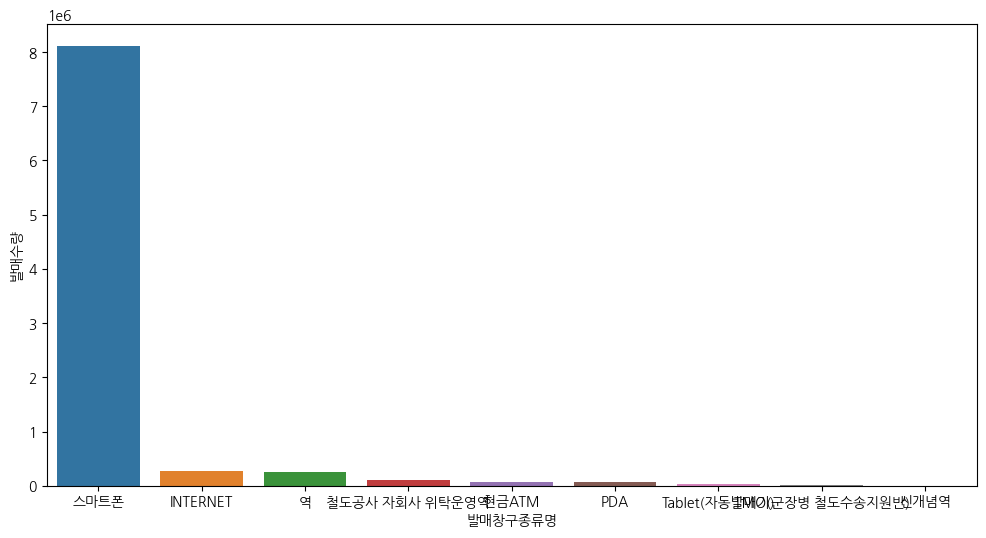

In [80]:
#가장 많이 티켓을 발매하는 곳은 어디일까? (channel)

table = pd.pivot_table(by_channel,values='발매수량',index='발매창구종류명',aggfunc='sum').sort_values(ascending=False,by='발매수량')
plt.figure(figsize=(12,6))
sns.barplot(table, x=table.index, y='발매수량')

([<matplotlib.patches.Wedge at 0x2083caebed0>,
 [Text(-0.22289678843987573, 1.077180125003794, '경부선'),
  Text(0.2228967884398756, -1.0771801250037942, '호남선')],
 [Text(-0.12158006642175037, 0.5875527954566149, '56.5%'),
  Text(0.12158006642175032, -0.587552795456615, '43.5%')])

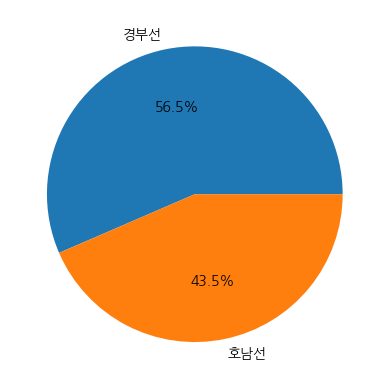

In [101]:
#가장 운행을 많이 하는 노선은 어디일까? (channel)

label=['경부선','호남선']
values=[0.56495, 0.43505]
by_channel['노선명'].value_counts(normalize=True)
plt.pie(values,labels=label, autopct='%.1f%%')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '0 days 00:00:00'),
  Text(1, 0, '1 days 00:00:00'),
  Text(2, 0, '2 days 00:00:00'),
  Text(3, 0, '3 days 00:00:00'),
  Text(4, 0, '4 days 00:00:00'),
  Text(5, 0, '5 days 00:00:00'),
  Text(6, 0, '6 days 00:00:00'),
  Text(7, 0, '7 days 00:00:00'),
  Text(8, 0, '8 days 00:00:00'),
  Text(9, 0, '9 days 00:00:00'),
  Text(10, 0, '10 days 00:00:00'),
  Text(11, 0, '11 days 00:00:00'),
  Text(12, 0, '12 days 00:00:00'),
  Text(13, 0, '13 days 00:00:00'),
  Text(14, 0, '14 days 00:00:00'),
  Text(15, 0, '15 days 00:00:00'),
  Text(16, 0, '16 days 00:00:00'),
  Text(17, 0, '17 days 00:00:00'),
  Text(18, 0, '18 days 00:00:00'),
  Text(19, 0, '19 days 00:00:00'),
  Text(20, 0, '20 days 00:00:00'),
  Text(21, 0, '21 days 00:00:00'),
  Text(22, 0, '22 days 00:00:00'),
  Text(23, 0, '23 days 00:00:00'),
  Text(24, 0, '24 days 00:00:00'),

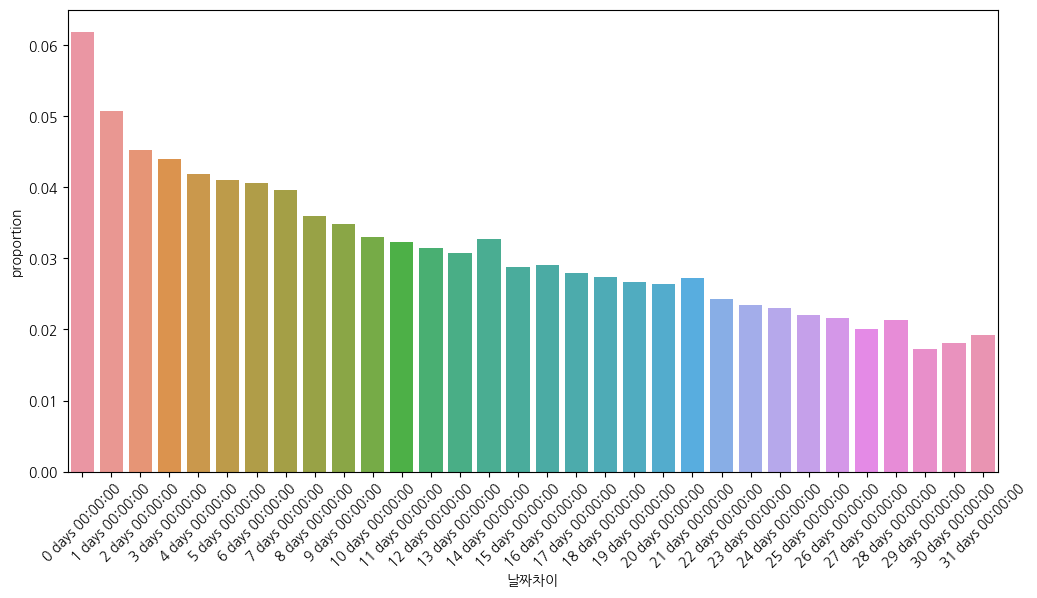

In [157]:
#운행일과 예매일의 차이는 어느정도일까? (channel)

table = by_channel['날짜차이'].value_counts(normalize=True).sort_index().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(table, x='날짜차이', y='proportion')
plt.xticks(rotation=45)

In [201]:
#환불 정도 보기1(channel)

gyungbu = by_channel[by_channel['노선명']=='경부선']
honam = by_channel[by_channel['노선명']=='호남선']

day = []
refund = []
tickets = []
    
for i in range(1,4):
    for j in range(1,32):
        if i == 2 and j >=29:
            continue
        else:
            d = gyungbu[(gyungbu['운행일자']==f'2023-{i}-{j}') & (gyungbu['발매창구종류명']=='스마트폰')]['운행일자'].iloc[0]
            r = gyungbu[(gyungbu['운행일자']==f'2023-{i}-{j}') & (gyungbu['발매창구종류명']=='스마트폰')]['환불정도'].mean()
            t = gyungbu[(gyungbu['운행일자']==f'2023-{i}-{j}') & (gyungbu['발매창구종류명']=='스마트폰')]['발매수량'].sum()
            day.append(d), refund.append(r), tickets.append(t)

refund_gyungbu = pd.DataFrame({'일':day,
                              '환불정도':refund,
                              '총 티켓 수':tickets})
#gyungbu[(gyungbu['발매창구종류명']=='스마트폰') & (gyungbu['운행일자']=='2023-1-2')]
#plt.subplots(1,2,1)

IndexError: single positional indexer is out-of-bounds

In [183]:
#환불 정도 보기1(channel)

gyungbu = by_channel[by_channel['노선명']=='경부선']
honam = by_channel[by_channel['노선명']=='호남선']

day = []
refund = []
tickets = []
    
for i in range(1,32):
    d = gyungbu[(gyungbu['운행일자']==f'2023-01-{i}') & (gyungbu['발매창구종류명']=='스마트폰')]['운행일자'].iloc[0]
    r = gyungbu[(gyungbu['운행일자']==f'2023-01-{i}') & (gyungbu['발매창구종류명']=='스마트폰')]['환불정도'].mean()
    t = gyungbu[(gyungbu['운행일자']==f'2023-01-{i}') & (gyungbu['발매창구종류명']=='스마트폰')]['발매수량'].sum()
    day.append(d), refund.append(r), tickets.append(t)

refund_gyungbu = pd.DataFrame({'일':day,
                              '환불정도':refund,
                              '총 티켓 수':tickets})

Timestamp('2023-01-01 00:00:00')

In [207]:
gyungbu[(gyungbu['운행일자']==f'2023-01-2') & (gyungbu['발매창구종류명']=='스마트폰')]['운행일자'].iloc[0]

Timestamp('2023-01-02 00:00:00')

<Axes: xlabel='발매역명', ylabel='count'>

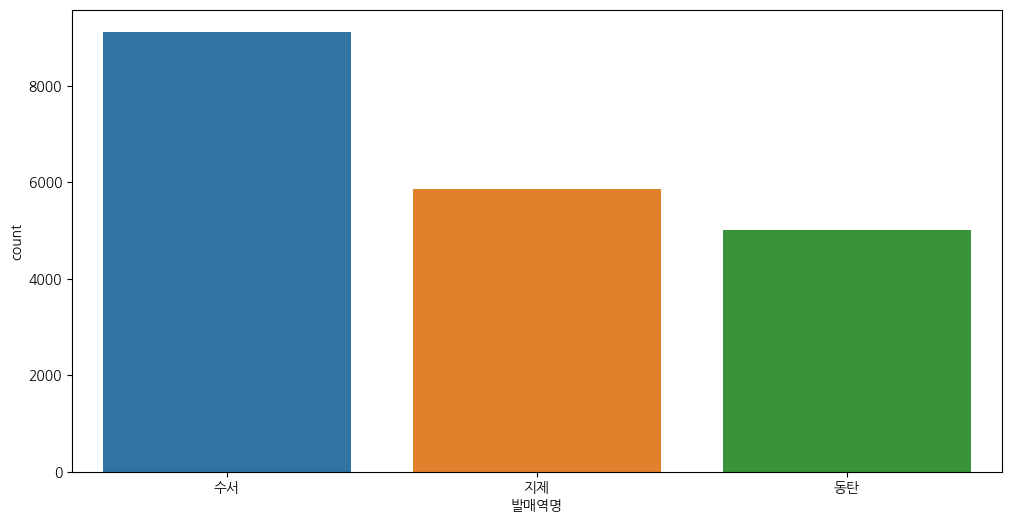

In [119]:
#발권하는 곳이 가장 많은 곳은 어디일까? (station)
plt.figure(figsize=(12,6))
table = by_station['발매역명'].value_counts().reset_index()
sns.barplot(table, x='발매역명', y='count')

In [ ]:
#인증키 : 1bVt7XCloZptrTwPRfarbdvxEDoRb1WeHHMuuqkVGHEKIr83gR4I15YQhuXkxNo7QW3PigOT3%2BnsuLi4Mt9dMg%3D%3D

In [124]:
by_station

,인쇄완료수량,환불수,노선명,운행일자,발매수량,발매역코드,발매역명,발매일자
0,1,0,경부선,20230101,1,0551,수서,20221201
1,1,1,경부선,20230101,2,0553,지제,20221201
2,5,0,호남선,20230101,5,0551,수서,20221201
3,2,0,경부선,20230101,2,0552,동탄,20221202
4,6,0,경부선,20230101,6,0553,지제,20221202
...,...,...,...,...,...,...,...,...
19995,3,1,경부선,20230717,4,0552,동탄,20230716
19996,8,4,경부선,20230717,12,0553,지제,20230716
19997,10,3,호남선,20230717,13,0551,수서,20230716
19998,3,2,호남선,20230717,5,0552,동탄,20230716
